<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_2_Sum_of_Two_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary :**                                         
1) Importing Libraries                                                    
2) Loading Dataset                                                     
3) Data PreProcessing                                  
4) EDA (Exploratory Data Analysis)                               
5) Train and Test Split                                     
6) Standard Scaler                                       
7) Modelling                                      
8) Making Prediction                                      
9) Compare Actual and Predicted Scores                                  
10) Evaluation Metrics                                        

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**2) Loading DataSet**

In [2]:
data = pd.read_csv("/content/add.csv")

**3) Data Preprocessing**

1) Top Five Rows of DataSet

In [3]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


2) Last Five Rows of DataSet

In [4]:
data.tail()

,x,y,sum
17,400.0,45.7,445.7
18,34.6,56.9,91.5
19,400.5,356.0,756.5
20,45.7,123.7,169.4
21,1000.0,3456.0,4456.0


3) Shape of DataSet

In [5]:
data.shape
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  22
Number of Columns:  3


4) data Types

In [6]:
data.dtypes

x      float64
y      float64
sum    float64
dtype: object

5) Getting Information of DataSet

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       22 non-null     float64
 1   y       22 non-null     float64
 2   sum     22 non-null     float64
dtypes: float64(3)
memory usage: 656.0 bytes


6) Checking Missing Values of DataSet

In [8]:
data.isnull().sum()

x      0
y      0
sum    0
dtype: int64

7) Droping Duplicates Values of Dataset

In [9]:
data = data.drop_duplicates()

8) Statistical Measures

In [10]:
data.describe()

,x,y,sum
count,22.000000,22.000000,22.000000
mean,136.786364,248.686364,385.472727
std,229.622745,732.554988,938.706461
min,1.000000,1.000000,2.000000
25%,15.500000,31.000000,66.500000
50%,40.150000,56.800000,117.450000
75%,175.000000,85.925000,245.975000
max,1000.000000,3456.000000,4456.000000


9) IQR (Inter Quantile Range)            

    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR)   


X Values

In [23]:
IQR = data.x.quantile(0.75) - data.x.quantile(0.25)
Upper_Threshold = data.x.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = data.x.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  414.25
Lower_Threshold :  -223.75


Y Values

In [24]:
IQR = data.y.quantile(0.75) - data.y.quantile(0.25)
Upper_Threshold = data.y.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = data.y.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  168.31250000000003
Lower_Threshold :  -51.38750000000002


**4) EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Sum of Two Numbers')

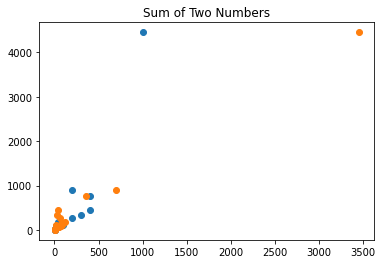

In [11]:
plt.scatter(data["x"],data["sum"])
plt.scatter(data["y"],data["sum"])
plt.title("Sum of Two Numbers")

In [12]:
data.corr()

,x,y,sum
x,1.000000,0.867381,0.921509
y,0.867381,1.000000,0.992563
sum,0.921509,0.992563,1.000000


**5) Train and Test Split**

In [13]:
X = data[["x","y"]]
y = data["sum"]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25 ,random_state = 7)

**6) Standard Scaler**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.82783332, -0.58414576],
       [-0.65998077, -0.33875263],
       [-0.81016463, -0.5715615 ],
       [ 7.97117407, 21.13629227],
       [ 2.67498438,  1.63068454],
       [-0.75274139, -0.25255043]])

**7) Modelling**

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**8) Making Prediction**

y = β0 + β1x1 +β2x2 +.....+ βnxn                 
 
y -> Predict Target                     
x1,x2 -> Features                         
β1,β2,βn -> Parameters

m -> coef_                       
c -> intercept_                            


In [17]:
lin_reg.coef_

array([1., 1.])

In [18]:
lin_reg.intercept_

2.842170943040401e-14

In [19]:
lin_reg.predict([[40,80]])

array([120.])

**9) Compare Actual and Prediction Scores**

In [20]:
y_pred = lin_reg.predict(X_test)
y_pred

array([   8. ,   66. ,   12. , 4456. ,  756.5,   69.2])

In [21]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred})
df

,Actual,Prediction
1,8.0,8.0
5,66.0,66.0
2,12.0,12.0
21,4456.0,4456.0
19,756.5,756.5
12,69.2,69.2


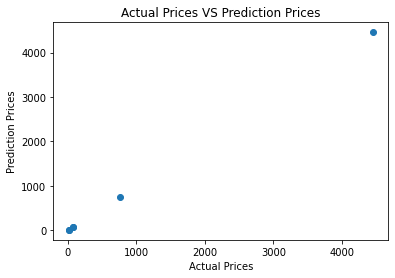

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

**10) Evaluation Metrics**

In [22]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred))

R2-Scores:  1.0
